# 1. Reading and Understanding the dataset

## 1 Reading the dataset

In [53]:
import pandas as pd

df = pd.read_csv('../datasets/spam_assassin.csv')
df = df.rename(columns={
  'text': 'email',
  'target': 'label',
})
df.head()

,email,label
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [54]:
# This is to see the data types interpreted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5796 non-null   object
 1   label   5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [55]:
df.isnull().sum()

email    0
label    0
dtype: int64

In [56]:
# Converting the data type to string
df['email'] = df['email'].astype(str).str.lower()
df.head()

,email,label
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0
1,from gort44@excite.com mon jun 24 17:54:21 200...,1
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5796 non-null   object
 1   label   5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_2608\2506992791.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_labels)


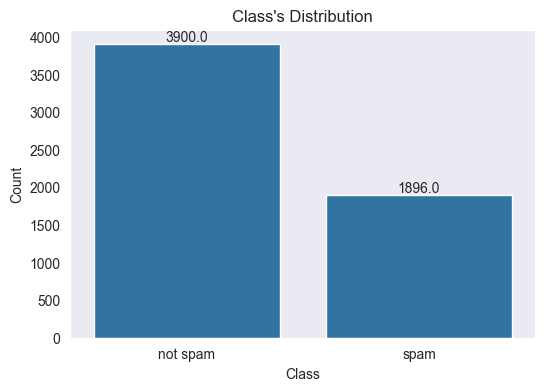

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['label'])

# Define class labels
class_labels = ['not spam', 'spam']

# Set x-axis tick labels
ax.set_xticklabels(class_labels)

plt.title("Class's Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')  # Show only horizontal grid lines

# Add count labels on top of each bar
for p in ax.patches:
  ax.annotate(
    f'{p.get_height()}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 5),
    textcoords='offset points')

plt.show()

## 2 Visualizing the dataset

### 2.1 Word Cloud

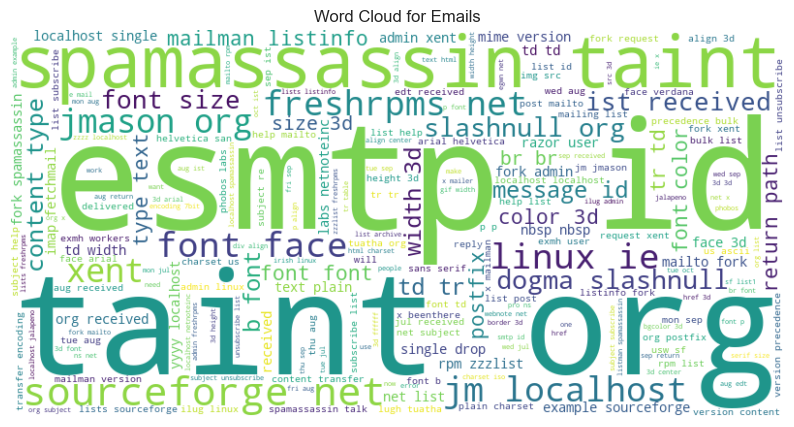

In [59]:
from wordcloud import WordCloud

# Generate word cloud for the 'email' column
text = " ".join(df['email'])
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=4) \
             .generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Emails")
plt.show()

### 2.2 Word Count

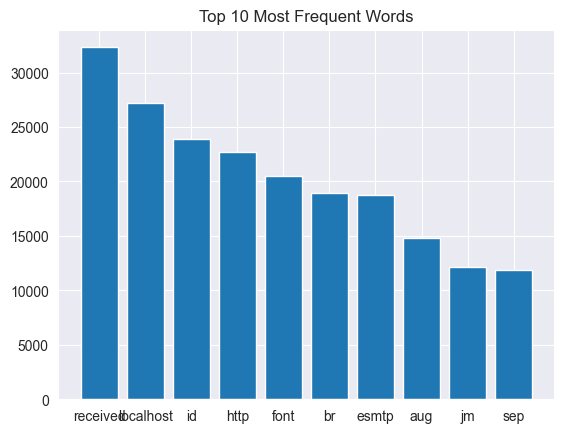

In [60]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('averaged_perceptron_tagger_eng')

# Example text data
text = " ".join(df['email'])

# Tokenize and remove stopwords/punctuation
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(text.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get word frequencies
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Plot the bar chart
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words")
plt.show()

### 2.3 Email Lengths Distribution

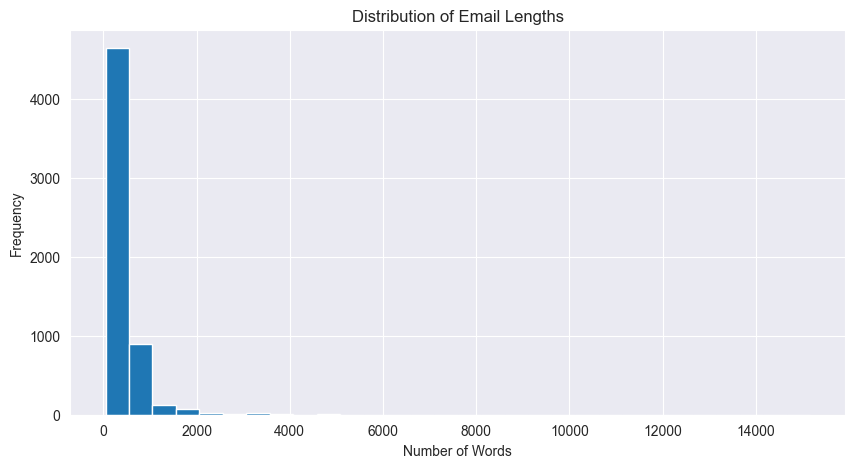

In [61]:
email_lengths = df['email'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(email_lengths, bins=30)
plt.title('Distribution of Email Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### 2.4 Common N-grams

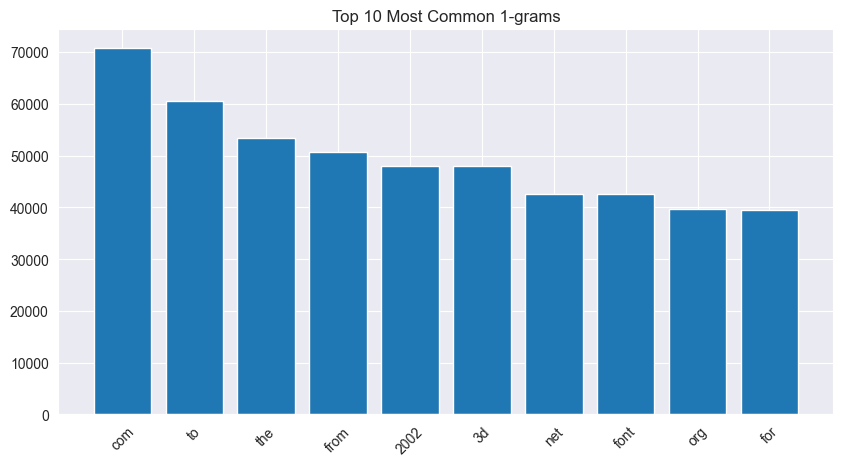

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def plot_ngram(ngram_range: int, max_words: int):
  # Create a bigram (n-word) count vectorizer
  vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
  X = vectorizer.fit_transform(df['email'])

  # Sum up the counts of each bigram
  ngram_counts = X.sum(axis=0)
  ngrams = vectorizer.get_feature_names_out()
  ngram_freq = [(ngrams[i], ngram_counts[0, i]) for i in range(len(ngrams))]
  ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:max_words]

  # Plot top 20 bigrams
  ngram_words, ngram_counts = zip(*ngram_freq)
  plt.figure(figsize=(10, 5))
  plt.bar(ngram_words, ngram_counts)
  plt.xticks(rotation=45)
  plt.title(f'Top {max_words} Most Common {ngram_range}-grams')
  plt.show()

plot_ngram(ngram_range=1, max_words=10)

### 2.5 POS Tag Frequency

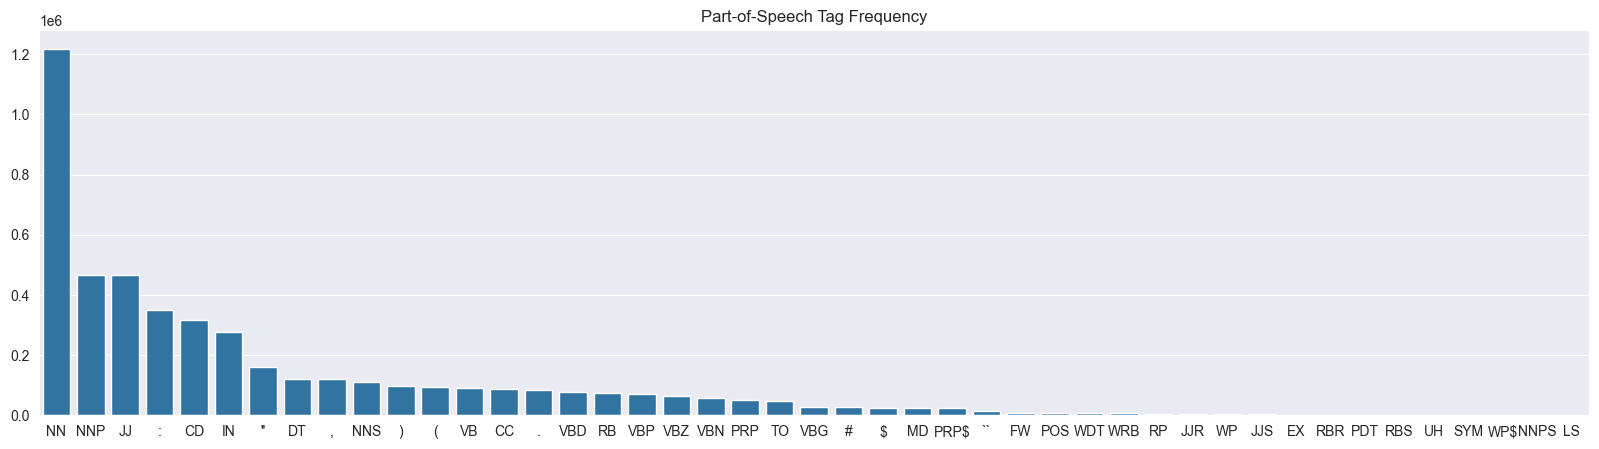

In [63]:
# Tokenize text into words
text_data = ' '.join(df['email'])
words = nltk.word_tokenize(text_data)

# Tag the words with their POS tags
pos_tags = nltk.pos_tag(words)

# Count the frequency of each POS tag
pos_counts = Counter(tag for word, tag in pos_tags)

# Plot the POS tag frequencies
pos_labels, pos_freq = zip(*pos_counts.most_common())
plt.figure(figsize=(20, 5))
sns.barplot(x=list(pos_labels), y=list(pos_freq))
plt.title('Part-of-Speech Tag Frequency')
plt.show()

### 2.6 TF-IDF Visualization

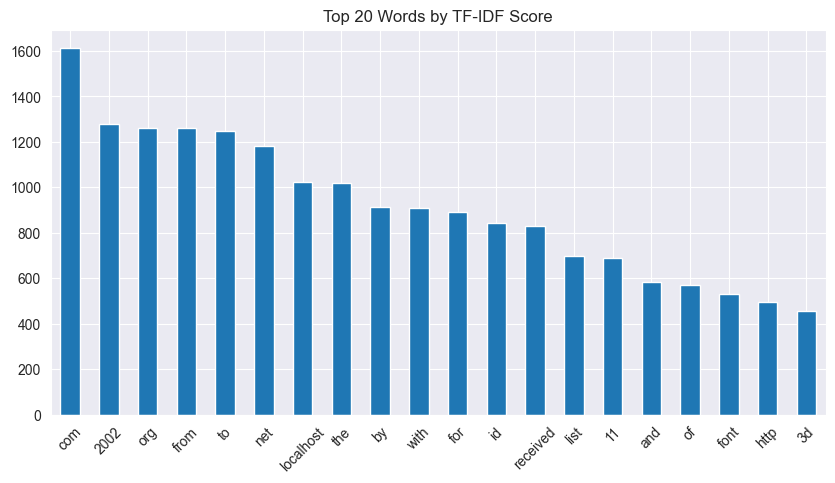

In [64]:
# Compute TF-IDF scores
tfidf = TfidfVectorizer(max_features=20)
X = tfidf.fit_transform(df['email'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Visualize the top 20 TF-IDF scores
tfidf_sum = tfidf_df.sum(axis=0)
tfidf_sorted = tfidf_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
tfidf_sorted.plot(kind='bar')
plt.title('Top 20 Words by TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

# 2. Preprocessing the dataset

## 1 Removing unnecessary stopwords

In [65]:
import string

stop_words = set(stopwords.words('english'))
puncture = set(string.punctuation)

def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words and word not in puncture])

In [66]:
df['email'] = df['email'].apply(remove_stopwords)
df.head()

,email,label
0,ilug-admin@linux.ie mon jul 29 11:28:02 2002 r...,0
1,gort44@excite.com mon jun 24 17:54:21 2002 ret...,1
2,fork-admin@xent.com mon jul 29 11:39:57 2002 r...,1
3,dcm123@btamail.net.cn mon jun 24 17:49:23 2002...,1
4,ilug-admin@linux.ie mon aug 19 11:02:47 2002 r...,0


## 2 Lemmatizing the emails

In [67]:
import spacy
# !{sys.executable} -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')

def lemmatize(emails):
  texts = emails.astype(str).tolist() # Get texts as a list of strings

  lemmatized_texts = []
  for doc in nlp.pipe(texts, batch_size=100, disable=["parser", "ner"], n_process=-1):
    lemmatized_texts.append(" ".join([token.lemma_ for token in doc]))

  return pd.Series(lemmatized_texts, index=emails.index)

In [68]:
df['email'] = lemmatize(df['email'])
df['basic_words'] = df['email'].apply(lambda x: x.split())
df['word_count'] = df['basic_words'].apply(lambda x: len(x))

df.head()

,email,label,basic_words,word_count
0,ilug-admin@linux.ie mon jul 29 11:28:02 2002 r...,0,"[ilug-admin@linux.ie, mon, jul, 29, 11:28:02, ...",618
1,gort44@excite.com mon jun 24 17:54:21 2002 ret...,1,"[gort44@excite.com, mon, jun, 24, 17:54:21, 20...",422
2,fork-admin@xent.com mon jul 29 11:39:57 2002 r...,1,"[fork-admin@xent.com, mon, jul, 29, 11:39:57, ...",608
3,dcm123@btamail.net.cn mon jun 24 17:49:23 2002...,1,"[dcm123@btamail.net.cn, mon, jun, 24, 17:49:23...",278
4,ilug-admin@linux.ie mon aug 19 11:02:47 2002 r...,0,"[ilug-admin@linux.ie, mon, aug, 19, 11:02:47, ...",495


## 3 Removing duplicate words

In [69]:
df['email'] = df['email'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

## 4 Removing biased word(s)

In [70]:
# words_to_remove = ['number']
# pattern = r'|'.join(words_to_remove)
#
# df['email'] = df['email'].str.replace(pattern, '', regex=False)

## 5 Vectorizing the emails

In [71]:
vectorizer = CountVectorizer(min_df=1, max_features=1000)

vectorizer.fit(df['email'])
vector_matrix = vectorizer.transform(df['email'])
vector_df = pd.DataFrame(vector_matrix.toarray(), columns=vectorizer.get_feature_names_out())

vector_df.head()

,00,000,0000,000000,000080,0000ff,01,0100,02,0200,...,year,yes,yet,you,your,yyyy,zzzlist,zzzz,zzzzason,zzzzteana
0,2,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


# 3. Training and Prediction

## 1 Assigning Training and Testing Sets

In [72]:
X = vector_df
X[:5]

,00,000,0000,000000,000080,0000ff,01,0100,02,0200,...,year,yes,yet,you,your,yyyy,zzzlist,zzzz,zzzzason,zzzzteana
0,2,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
y = df.iloc[:, 1]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 2 Models train and predict

### 2.1 Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_split=4, min_samples_leaf=2)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
y_rf_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [76]:
y_rf_train_pred = rf.predict(X_train)
y_rf_train_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### 2.2 Support Vector Machine

In [77]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_svm_pred = svm.predict(X_test)
y_svm_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [78]:
y_svm_train_pred = svm.predict(X_train)
y_svm_train_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### 2.3 KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Tested and validated metrics: cosine, jaccard, correlation, infinity, dice, chebyshev, braycurtis
knn = KNeighborsClassifier(metric='jaccard',n_neighbors=3)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)
y_knn_pred[:5]

D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([1, 1, 0, 0, 0], dtype=int64)

In [80]:
y_knn_train_pred = knn.predict(X_train)
y_knn_train_pred[:5]

D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([0, 0, 0, 0, 1], dtype=int64)

### 2.4 Multinomial Naive Bayes

In [81]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_nb_pred = nb.predict(X_test)
y_nb_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [82]:
y_nb_train_pred = nb.predict(X_train)
y_nb_train_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### 2.5 Neural Networks

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

nn = Sequential()

"""
  - Adding the first layer, with 64 neurons
  - ReLU (Rectified Linear Unit) is a non-linear activation function.
    + It outputs the input if it's positive, and zero otherwise.
    + ReLU introduces non-linearity to the network, which helps it learn complex patterns.
    + Otherwies, the model would only learn linear relationships.
"""
nn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Doing similar to above
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))

# Output layer (binary classification)
"""
  - The sigmoid activation function
    + Squashes the output into a range between 0 and 1, making it suitable for binary classification.
    + The network will output a probability that a given input belongs to class 1 (the other class will have probability 0).
"""
nn.add(Dense(1, activation='sigmoid'))

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

nn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train_np, y_train_np, epochs=10, validation_data=(X_test_np, y_test_np))

y_nn_pred = nn.predict(X_test_np)
y_nn_pred[:5]

Epoch 1/10
145/145 [==============================] - 1s 3ms/step - loss: 0.1315 - accuracy: 0.9420 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 2/10
145/145 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0169 - val_accuracy: 0.9957
Epoch 3/10
145/145 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0163 - val_accuracy: 0.9948
Epoch 4/10
145/145 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0119 - val_accuracy: 0.9957
Epoch 5/10
145/145 [==============================] - 0s 2ms/step - loss: 4.0685e-04 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9957
Epoch 6/10
145/145 [==============================] - 0s 2ms/step - loss: 2.6990e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9957
Epoch 7/10
145/145 [==============================] - 0s 2ms/step - loss: 4.3275e-04 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0

array([[9.9998844e-01],
       [9.9999744e-01],
       [1.3704531e-08],
       [1.2494831e-05],
       [3.6324268e-09]], dtype=float32)

In [84]:
y_nn_pred = nn.predict(X_train_np)
y_nn_pred[:5]

145/145 [==============================] - 0s 990us/step


array([[1.2595626e-05],
       [2.4371580e-08],
       [1.3190405e-06],
       [3.0571178e-07],
       [9.9984783e-01]], dtype=float32)

### 2.6 XGBoost

In [85]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb_pred = xgb.predict(X_test)
y_xgb_pred[:5]

array([1, 1, 0, 0, 0])

In [86]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_train_pred[:5]

array([0, 0, 0, 0, 1])

# 4. Evaluation

In [87]:
loss, accuracy = nn.evaluate(X_test_np, y_test_np)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

37/37 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9957
Test Loss: 0.0142
Test Accuracy: 0.9957


In [88]:
train_loss, train_accuracy = nn.evaluate(X_train_np, y_train_np)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

145/145 [==============================] - 0s 1ms/step - loss: 5.3874e-05 - accuracy: 1.0000
Train Loss: 0.0001
Train Accuracy: 1.0000


In [89]:
# from google.colab import

# download(y_rf_pred, 'rf_pred.csv')

## 1 Raw Texts

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def predict_and_evaluate(X_test_set: list, y_test_set: list):
  models = {
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn,
    "Naive Bayes": nb,
    "XGBoost": xgb,
  }

  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  loss_list = []
  model_names = []

  for model_name in models:
    y_pred = models[model_name].predict(X_test_set)
    print(f"Evaluation for {model_name}:")
  
    accuracy = accuracy_score(y_test_set, y_pred)
    precision = precision_score(y_test_set, y_pred)
    recall = recall_score(y_test_set, y_pred)
    f1 = f1_score(y_test_set, y_pred)
    loss = log_loss(y_test_set, y_pred)
  
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    loss_list.append(loss)
  
    model_names.append(model_name)
  
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Loss: {loss:.4f}\n")

  return accuracy_list, precision_list, recall_list, f1_list, loss_list, model_names

In [91]:
accuracy_list_origin, precision_list_origin, recall_list_origin, f1_list_origin, loss_list_origin, model_names_origin = predict_and_evaluate(X_test, y_test)

Evaluation for Random Forest:
Accuracy: 0.9784
Precision: 0.9890
Recall: 0.9446
F1 Score: 0.9663
Loss: 0.7768

Evaluation for SVM:
Accuracy: 0.9759
Precision: 0.9861
Recall: 0.9393
F1 Score: 0.9622
Loss: 0.8700



D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Evaluation for KNN:
Accuracy: 0.9836
Precision: 0.9945
Recall: 0.9551
F1 Score: 0.9744
Loss: 0.5904

Evaluation for Naive Bayes:
Accuracy: 0.9483
Precision: 0.9878
Recall: 0.8522
F1 Score: 0.9150
Loss: 1.8643

Evaluation for XGBoost:
Accuracy: 0.9914
Precision: 0.9920
Recall: 0.9815
F1 Score: 0.9867
Loss: 0.3107



## 2 Graphs

### 2.1 Model Metrics

In [92]:
import numpy as np

def visualize_comparison(
    accuracy_list: list,
    precision_list: list,
    recall_list: list,
    f1_list: list,
    loss_list: list,
    model_names: list
):
  """
  Drawing a Graph to visualize the comparison of the models

  :param accuracy_list: List of models' accuracy
  :param precision_list: List of models' precision
  :param recall_list: List of models' recall
  :param f1_list: List of models' f1
  :param loss_list: List of models' loss
  :param model_names: List of models' model
  :return: A Bar Chart comparing the results of different models
  """

  metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
  x = np.arange(len(metrics))  # X locations for the groups

  fig, ax = plt.subplots(figsize=(20, 6))
  width = 0.16

  # Plot each model's results as a bar
  for i, model in enumerate(model_names):
      values = [accuracy_list[i], precision_list[i], recall_list[i], f1_list[i], loss_list[i]]
      bars = ax.bar(x + i * width, values, width, label=model)

      # Add the value text above each bar
      for bar in bars:
          yval = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

  # Labeling
  ax.set_xlabel("Metrics")
  ax.set_ylabel("Scores")
  ax.set_title("Performance Comparison of Models")
  ax.set_xticks(x + width * (len(model_names) - 1) / 2)
  ax.set_xticklabels(metrics)
  ax.legend()

  plt.show()

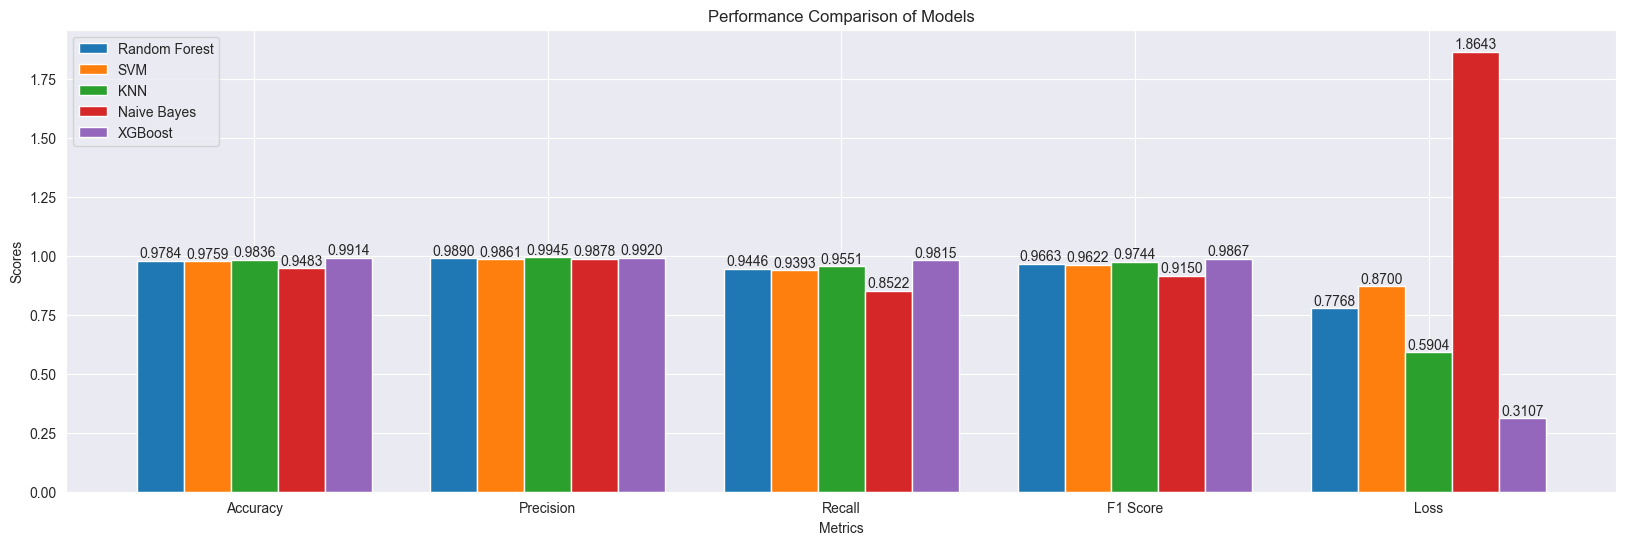

In [93]:
visualize_comparison(accuracy_list_origin, precision_list_origin, recall_list_origin, f1_list_origin, loss_list_origin, model_names_origin)

### 2.2 Model Train Set and Test Set Prediction Comparison

In [94]:
train_results = {
    "Random Forest": y_rf_train_pred,
    "SVM": y_svm_train_pred,
    "KNN": y_knn_train_pred,
    "Naive Bayes": y_nb_train_pred,
    "XGBoost": y_xgb_train_pred
}

In [95]:
train_accuracy = []

for result in train_results:
  y_pred = train_results[result]
  accuracy = accuracy_score(y_train, y_pred)

  train_accuracy.append(accuracy)
  print(f"Train Accuracy for {result}: {accuracy:.4f}")

Train Accuracy for Random Forest: 0.9978
Train Accuracy for SVM: 0.9862
Train Accuracy for KNN: 0.9940
Train Accuracy for Naive Bayes: 0.9549
Train Accuracy for XGBoost: 1.0000


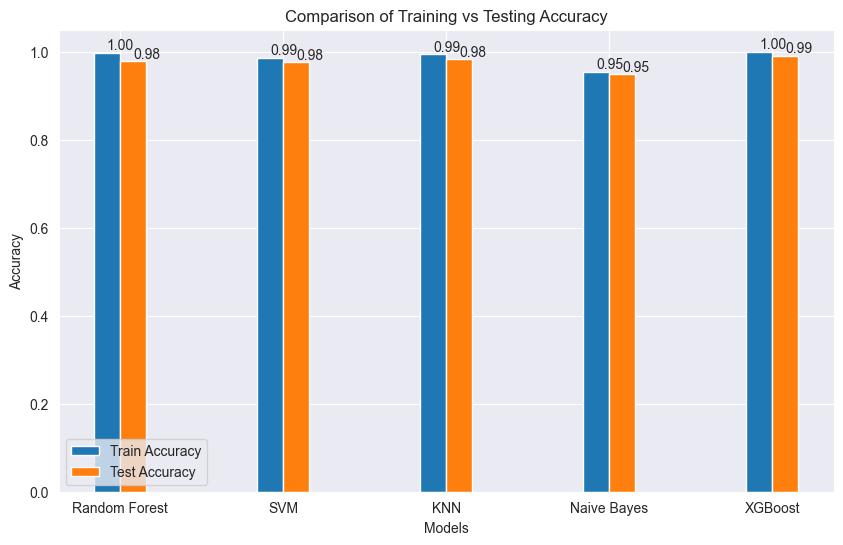

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
x = np.arange(len(metrics))  # X locations for the groups
width = 0.16

train_bars = ax.bar(x - width/2, train_accuracy, width, label='Train Accuracy')
test_bars = ax.bar(x + width/2, accuracy_list_origin, width, label='Test Accuracy')

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training vs Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names_origin)
ax.legend()

# Add numbers above the bars
for bar in train_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

for bar in test_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')

plt.grid(True)
plt.show()

# 5 Testing on a Different Dataset

## 1 Preprocessing

In [97]:
ass_df = pd.read_csv("../datasets/email_data.csv")
# ass_df = ass_df.rename(columns={
#   'text': 'email',
#   'target': 'label',
# })

ass_df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [98]:
def comprehensive_preprocess(text_series):
  # Ensure string type and lowercase
  processed = text_series.astype(str).str.lower()
  # Remove stopwords and basic punctuation
  processed = processed.apply(remove_stopwords)
  # Lemmatize (using the version that returns a Series with index)
  processed = lemmatize(processed)
  # Remove specific words/patterns (like 'number')
  # words_to_remove = ['number'] # Add others if needed
  # pattern = r'|'.join(words_to_remove)
  # processed = processed.str.replace(pattern, '', regex=False)
  # Add any other cleaning steps here...
  processed = processed.str.strip() # Remove leading/trailing whitespace
  return processed

In [99]:
ass_df['email_processed'] = comprehensive_preprocess(ass_df['email'])
vector_matrix = vectorizer.transform(ass_df['email_processed'])
vector_df = pd.DataFrame(vector_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [100]:
X = vector_df
X[:5]

,00,000,0000,000000,000080,0000ff,01,0100,02,0200,...,year,yes,yet,you,your,yyyy,zzzlist,zzzz,zzzzason,zzzzteana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y_original = df['label'].values
y = ass_df.iloc[:, 1]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## 2 Predicting

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [103]:
accuracy_list_ass, precision_list_ass, recall_list_ass, f1_list_ass, loss_list_ass, model_names_ass = predict_and_evaluate(X_test, y_test)

Evaluation for Random Forest:
Accuracy: 0.8967
Precision: 0.9130
Recall: 0.4200
F1 Score: 0.5753
Loss: 3.7245

Evaluation for SVM:
Accuracy: 0.8850
Precision: 0.6260
Recall: 0.7700
F1 Score: 0.6906
Loss: 4.1450



D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Evaluation for KNN:
Accuracy: 0.9650
Precision: 0.8835
Recall: 0.9100
F1 Score: 0.8966
Loss: 1.2615

Evaluation for Naive Bayes:
Accuracy: 0.9083
Precision: 0.6667
Recall: 0.9000
F1 Score: 0.7660
Loss: 3.3040

Evaluation for XGBoost:
Accuracy: 0.9267
Precision: 0.8889
Recall: 0.6400
F1 Score: 0.7442
Loss: 2.6432



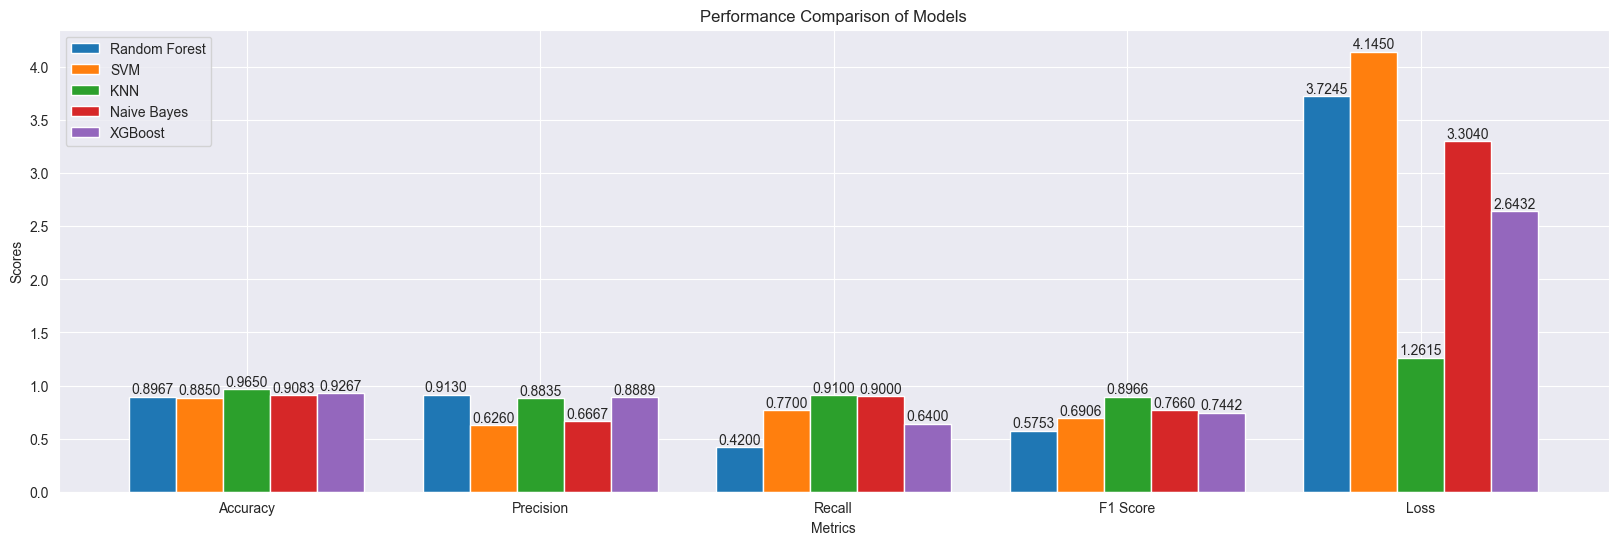

In [104]:
visualize_comparison(accuracy_list_ass, precision_list_ass, recall_list_ass, f1_list_ass, loss_list_ass, model_names_ass)